In [5]:
!pip install tensorflow

In [6]:
# Step 1: Install & import dependencies
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

import zipfile
import os

# Step 1: Import required libraries
import tensorflow as tf
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Upload and unzip the dataset
zip_file = "Plant Diseases Dataset.zip"  # Replace with your uploaded filename if different

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("dataset")  # Extract into 'dataset' folder








In [7]:
# Step 3: Check extracted folders
extracted_folders = os.listdir("dataset")
print("Extracted folders:", extracted_folders)

# Step 4: Define image parameters
img_size = (224, 224)
batch_size = 32

# Step 5: Define dataset directory (assuming structure is inside one folder after unzip)
data_dir = os.path.join("dataset", extracted_folders[0])  # auto-detect main folder inside 'dataset'

Extracted folders: ['Plant Diseases Dataset']


In [8]:
# Step 6: Load training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, 'train'),
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, 'valid'),
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

class_names = train_ds.class_names
num_classes = len(class_names)

Found 17112 files belonging to 9 classes.
Found 4278 files belonging to 9 classes.


In [9]:

# Step 7: Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Step 8: Load ResNet50 base model
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [10]:
# Step 9: Build the model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.resnet.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# Step 10: Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 11: Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# Step 12: Save the trained model
model.save("plant_model.keras")

Epoch 1/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 85s 129ms/step - accuracy: 0.8650 - loss: 0.4515 - val_accuracy: 0.9956 - val_loss: 0.0257
Epoch 2/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 64s 120ms/step - accuracy: 0.9931 - loss: 0.0313 - val_accuracy: 0.9979 - val_loss: 0.0123
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 84s 123ms/step - accuracy: 0.9969 - loss: 0.0168 - val_accuracy: 0.9991 - val_loss: 0.0082
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 82s 122ms/step - accuracy: 0.9973 - loss: 0.0127 - val_accuracy: 0.9993 - val_loss: 0.0064
Epoch 5/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 65s 122ms/step - accuracy: 0.9977 - loss: 0.0095 - val_accuracy: 0.9984 - val_loss: 0.0067
Epoch 6/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 56s 104ms/step - accuracy: 0.9983 - loss: 0.0079 - val_accuracy: 0.9984 - val_loss: 0.0060
Epoch 7/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.9989 - loss: 0.0058 - val_accuracy: 0.9995 - val_loss: 0.0030
Epoch 8/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 55s 103ms/step - accuracy: 0.9990 - loss: 0

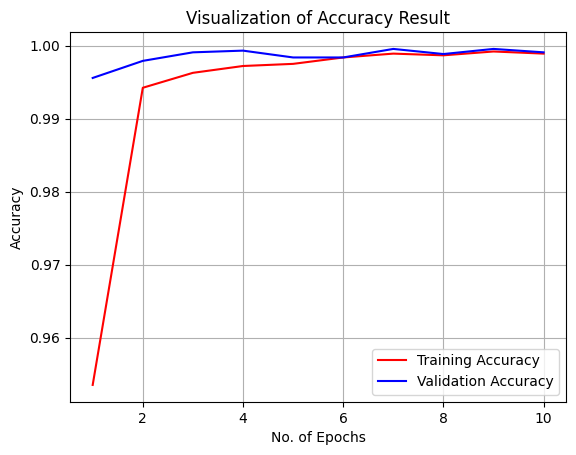

In [11]:
import matplotlib.pyplot as plt

# If you trained for 10 epochs:
epochs = [i for i in range(1, 11)]  # Update this to match your actual number of epochs

# Plot Training and Validation Accuracy
plt.plot(epochs, history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [13]:
# Collect true labels and predicted labels
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

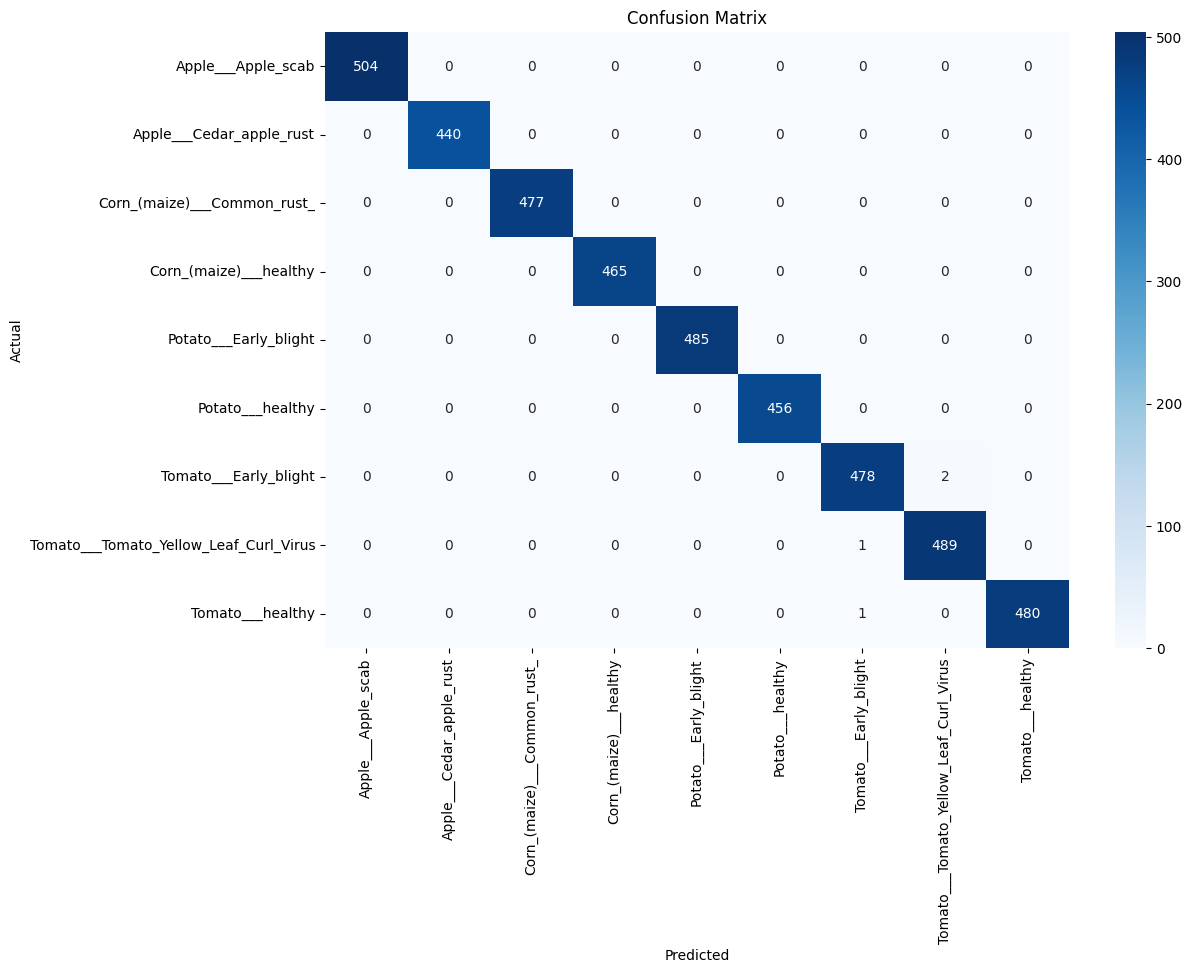

In [14]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # or 'weighted'
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Accuracy:  0.9991
Precision: 0.9991
Recall:    0.9991
F1 Score:  0.9991
